# importing librarys

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
%matplotlib inline

# loading data

In [2]:
df=pd.read_csv("advertising.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


**ad topics are going to be unique and not useful**

In [4]:
df=df.drop("Ad Topic Line",axis=1)

**I will drop country because city is more accurate than that**

In [5]:
len(list(df["Country"].unique()))

237

In [6]:
len(list(df["City"].unique()))

969

In [7]:
df=df.drop(["City","Country"],axis=1)

**too many data in city also I have to drop it to**

**===Extracting information from time stamp**

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],format="%Y-%m-%d %H:%M:%S")
df['year'] = pd.DatetimeIndex(df['Timestamp']).year
df['month'] = pd.DatetimeIndex(df['Timestamp']).month
df['day'] = pd.DatetimeIndex(df['Timestamp']).day
df['hour'] = pd.DatetimeIndex(df['Timestamp']).hour
df['minute'] = pd.DatetimeIndex(df['Timestamp']).minute
df['second'] = pd.DatetimeIndex(df['Timestamp']).second

In [9]:
df=df.drop("Timestamp",axis=1)

In [10]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,year,month,day,hour,minute,second
0,68.95,35,61833.90,256.09,0,0,2016,3,27,0,53,11
1,80.23,31,68441.85,193.77,1,0,2016,4,4,1,39,2
2,69.47,26,59785.94,236.50,0,0,2016,3,13,20,35,42
3,74.15,29,54806.18,245.89,1,0,2016,1,10,2,31,19
4,68.37,35,73889.99,225.58,0,0,2016,6,3,3,36,18


<AxesSubplot:>

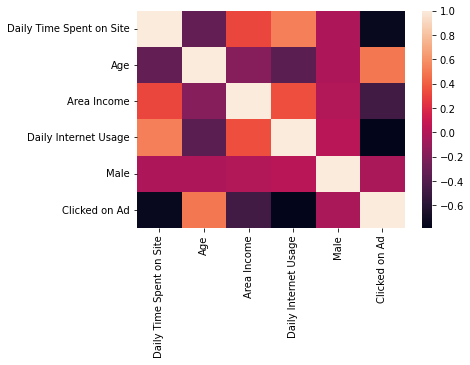

In [11]:
sns.heatmap(df.drop(["year","month","day","hour","minute","second"],axis=1).corr())

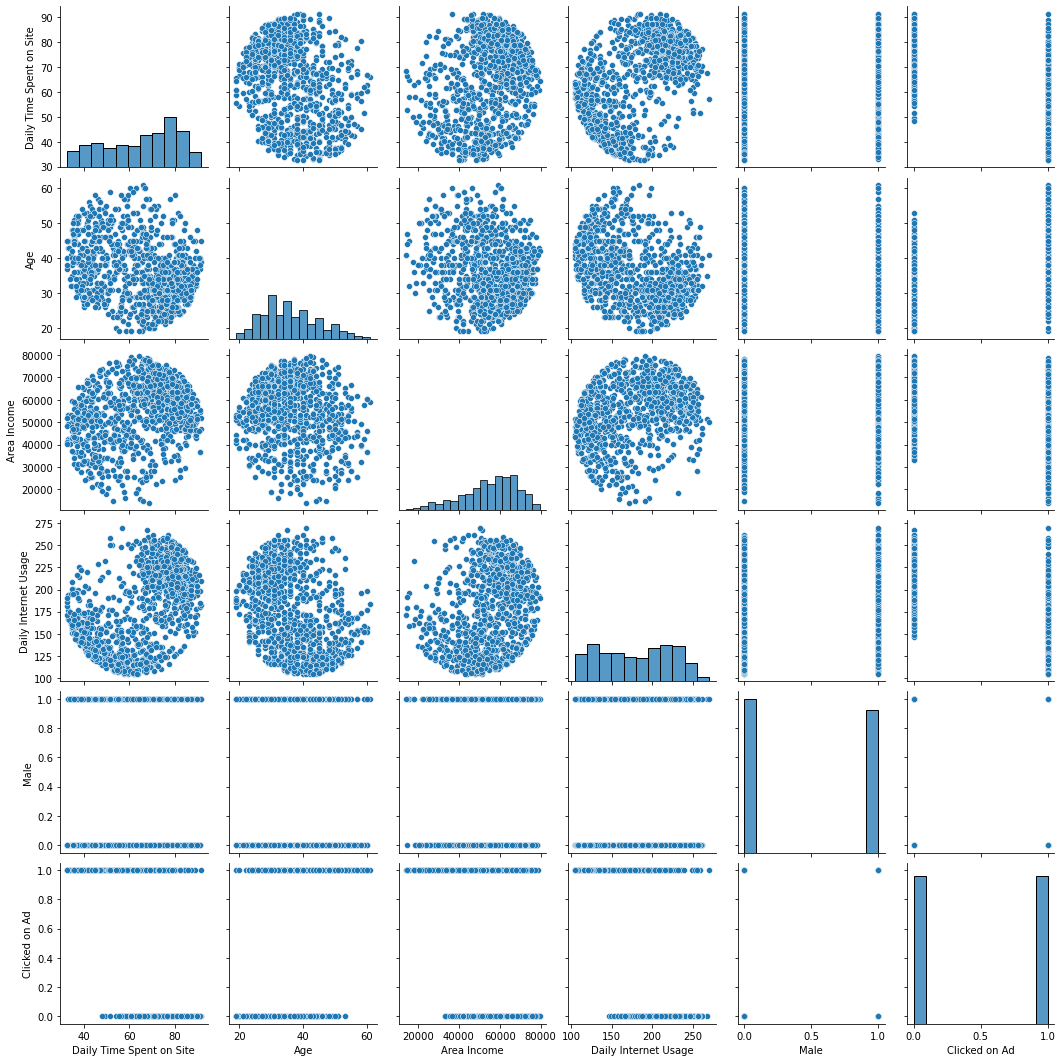

In [12]:
sns.pairplot(df.drop(["year","month","day","hour","minute","second"],axis=1))

**I have done data analysis on this data analisys prevoisly in my data analysis repo so I will pass this step**

In [13]:
x=df.drop("Clicked on Ad",axis=1)
y=df["Clicked on Ad"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

# KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn=KNeighborsClassifier()

In [18]:
parameters={"n_neighbors":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [19]:
knn_gs=GridSearchCV(knn,parameters)

In [20]:
knn_gs.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [21]:
knn_gs.best_params_

{'n_neighbors': 1}

In [22]:
knn_gs.best_score_

0.792

In [23]:
knn=KNeighborsClassifier(n_neighbors=1)
knn_res=cross_val_score(knn,x,y,cv=5)

In [24]:
knn_res

array([0.775, 0.805, 0.82 , 0.78 , 0.78 ])

# SVM

In [25]:
from sklearn.svm import SVC

In [26]:
parameters={"C":[1,10,100,1000,10000],
           "gamma":[1,.1,.001,.0001,.00001]}

In [27]:
svc=SVC()

In [28]:
svc_gs=GridSearchCV(svc,parameters)

In [29]:
svc_gs.fit(x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05]})

In [30]:
svc_gs.best_params_

{'C': 1000, 'gamma': 1e-05}

In [31]:
svc_gs.best_score_

0.876

In [32]:
svc_res=cross_val_score(SVC(C=1000,gamma=.00001),x,y,cv=5)

In [33]:
svc_res

array([0.84 , 0.865, 0.925, 0.87 , 0.88 ])

# DTC

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtc=DecisionTreeClassifier(criterion="gini")

In [36]:
dtc_res=cross_val_score(dtc,x,y,cv=5)

In [37]:
dtc_res

array([0.945, 0.93 , 0.955, 0.945, 0.94 ])

In [38]:
dtc=DecisionTreeClassifier(criterion="entropy")
dtc_res=cross_val_score(dtc,x,y,cv=5)
dtc_res

array([0.955, 0.945, 0.955, 0.93 , 0.94 ])

# RFC

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
parameters={"n_estimators":[100,200,300],
           "criterion":["gini","entropy"],
           "max_depth":[10,50,100],
           "max_features":['auto',"sqrt"],
           "oob_score":[True,False]}

In [41]:
rfc=RandomForestClassifier()

In [42]:
rfc_gs=GridSearchCV(rfc,parameters)

In [43]:
rfc_gs.fit(x,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300],
                         'oob_score': [True, False]})

In [44]:
rfc_gs.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'oob_score': True}

In [45]:
rfc=RandomForestClassifier(criterion='gini',
 max_depth= 100,
 max_features= 'auto',
 n_estimators= 200,
 oob_score= True)

In [46]:
rfc_res=cross_val_score(rfc,x,y,cv=5)

In [47]:
rfc_res

array([0.97 , 0.955, 0.97 , 0.95 , 0.955])

# Adb

In [48]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
adb=AdaBoostClassifier()

In [50]:
parameters={"n_estimators":[50,100,150,200],
    "learning_rate":[.5,.6,.4],
    "algorithm":['SAMME.R','SAMME']}

In [51]:
adb_gs=GridSearchCV(adb,parameters)

In [ ]:
adb_gs.fit(x,y)

In [ ]:
adb_gs.best_params_

In [ ]:
adb=AdaBoostClassifier(algorithm="SAMME",learning_rate=.5,n_estimators=150)

In [ ]:
adb_res=cross_val_score(adb,x,y,cv=5)

In [ ]:
adb_res

# GB

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier()

In [ ]:
parameters={"loss":["exponential",'deviance'],
    "learning_rate":[0.4,.5,.6],
    "n_estimators":[50, 100, 150, 200]}

In [ ]:
gbc_gs=GridSearchCV(gbc,parameters)

In [ ]:
gbc_gs.fit(x,y)

In [ ]:
gbc_gs.best_params_

In [ ]:
gbc=GradientBoostingClassifier(learning_rate=.6,loss="exponential",n_estimators=150)

In [ ]:
gbc_res=cross_val_score(gbc,x,y,cv=5)

In [ ]:
gbc_res

In [ ]:
print("--------------------REPORT-------------------\n")
print("knn:")
print("gride search best parameter:"+str(knn_gs.best_params_))
print("gride search best score:"+str(knn_gs.best_score_))
print("Best RESULT: "+str(knn_res.max()))

print("---------------------------------------------")
print("svm:")
print("gride search best parameter:"+str(svc_gs.best_params_))
print("gride search best score:"+str(svc_gs.best_score_))
print("Best RESULT: "+str(svc_res.max()))

print("---------------------------------------------")
print("dtc:")
print("did not use gride search for this")
print("Best RESULT: "+str(dtc_res.max()))

print("---------------------------------------------")
print("rfc:")
print("gride search best parameter:"+str(rfc_gs.best_params_))
print("gride search best score:"+str(rfc_gs.best_score_))
print("Best RESULT: "+str(rfc_res.max()))

print("---------------------------------------------")
print("adb:")
print("gride search best parameter:"+str(adb_gs.best_params_))
print("gride search best score:"+str(adb_gs.best_score_))
print("Best RESULT: "+str(adb_res.max()))

print("---------------------------------------------")
print("gbc:")
print("gride search best parameter:"+str(gbc_gs.best_params_))
print("gride search best score:"+str(gbc_gs.best_score_))
print("Best RESULT: "+str(gbc_res.max()))

print("---------------------------------------------")

